In [1]:
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
from matplotlib.dates import DateFormatter
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot
import functions_profiles
import functions_upwelling_depth

from salishsea_tools import nc_tools, viz_tools
from salishsea_tools import gsw_calls

In [2]:
bathy_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_05.nc')
bathy = bathy_file['Bathymetry']

coord_lats = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/coordinates/NEMO_files/coords_02.nc')['nav_lat'][:]

path = '/ocean/imachuca/Canyons/results_mackenzie/idealized/upwelling_events/'; cfg = 'eventB'
grid, lon, lat, tem, sal, ssh, U, V, W, tmask = functions_plot.load_model_output(path, cfg)
utau, vtau = functions_plot.load_model_other(path, cfg)
depth_levels = grid['deptht'][:]

In [3]:
ts_data = sio.loadmat('../data/for_stratification/canyonTSdata2.mat')
i_ref = 0
sal_ref = ts_data['salcanyon2'][:, i_ref]
dep_ref = ts_data['depthcanyon2'][:, i_ref]*-1

# Method: At specific depth

In [4]:
time_shot=3.25*24; sal_full=sal
ind_nanmax_full = functions_upwelling_depth.get_nanmax_ind_full(time_shot, sal_full)
y_unique, x_unique, x_specific, y_specific = functions_upwelling_depth.get_unique_values(ind_nanmax_full, 7)
sal_profiles_dep = functions_upwelling_depth.get_sal_profiles_rim(y_unique, x_unique, time_shot, sal_full)

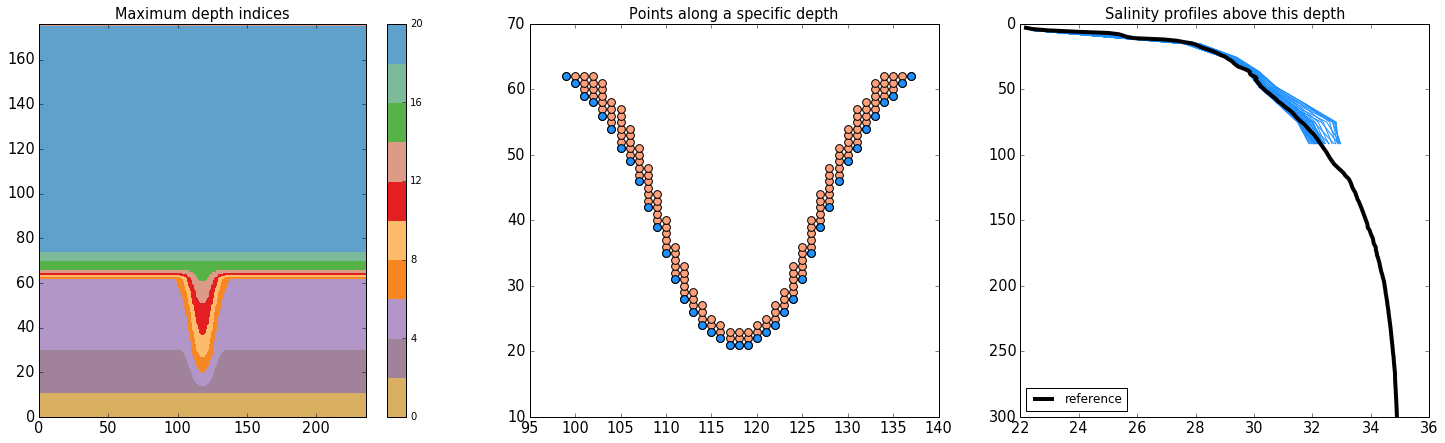

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,6))
fig.tight_layout(); fig.subplots_adjust(hspace=.3, wspace=.2); fs=14.5
p1 = ax1.contourf(ind_nanmax_full, cmap = 'Paired_r', levels=np.arange(22)[::2])
fig.colorbar(p1, ax=ax1); ax1.set_title('Maximum depth indices', fontsize = fs); ax1.tick_params(labelsize=fs)

ax2.scatter(x_specific, y_specific, s = 60, c = 'lightsalmon')
ax2.scatter(x_unique, y_unique, s = 60, c='dodgerblue')
ax2.set_title('Points along a specific depth', fontsize = fs); ax2.tick_params(labelsize=fs)

ax3.plot(sal_profiles_dep, grid['deptht'], c='dodgerblue', label='')
ax3.plot(sal_ref, dep_ref, lw = 2, c='k', linewidth=4, label = 'reference')
ax3.set_ylim([300,0]); ax3.legend(loc=3)
ax3.set_title('Salinity profiles above this depth', fontsize = fs); ax3.tick_params(labelsize=fs)

# Method: At canyon rim

In [6]:
time_shot=3.25*24; sal_full = sal
ind_nanmax_full = functions_upwelling_depth.get_nanmax_ind_full(time_shot, sal_full)
rim_y_xleft_xright = functions_upwelling_depth.get_rim_values(ind_nanmax_full, sal_full)
sal_profiles_rim_left = functions_upwelling_depth.get_sal_profiles_rim(rim_y_xleft_xright[:,0], rim_y_xleft_xright[:,1], time_shot, sal_full)
sal_profiles_rim_right = functions_upwelling_depth.get_sal_profiles_rim(rim_y_xleft_xright[:,0], rim_y_xleft_xright[:,2], time_shot, sal_full)

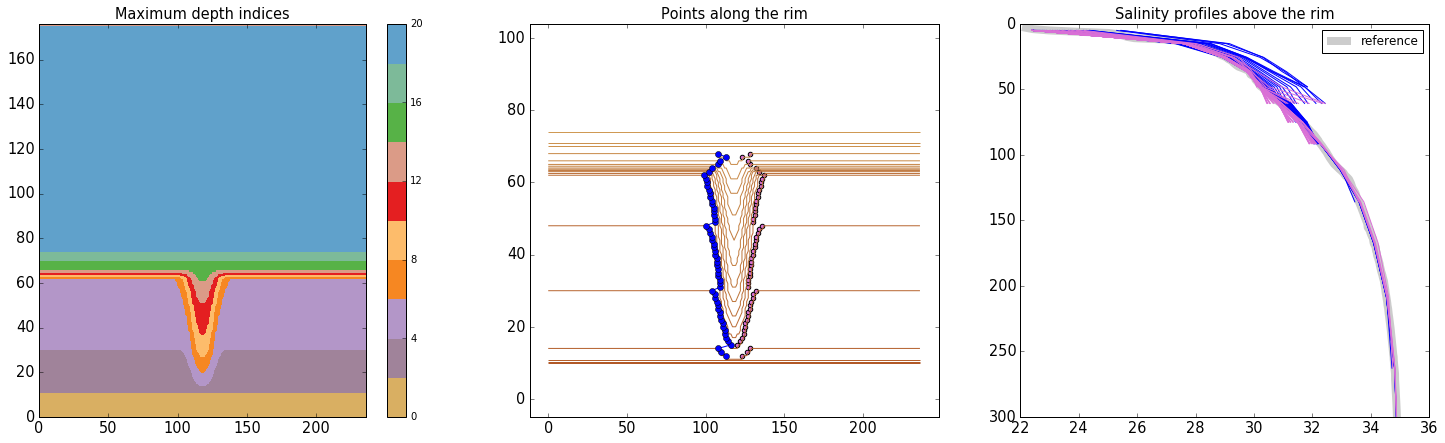

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,6))
fig.tight_layout(); fig.subplots_adjust(hspace=.3, wspace=.2); fs=14.5
p1 = ax1.contourf(ind_nanmax_full, cmap = 'Paired_r', levels=np.arange(22)[::2])
fig.colorbar(p1, ax=ax1); ax1.set_title('Maximum depth indices', fontsize = fs); ax1.tick_params(labelsize=fs)

p1 = ax2.contour(ind_nanmax_full[0:100,:], cmap = 'Paired_r', levels=np.arange(500))
ax2.plot(rim_y_xleft_xright[:,1], rim_y_xleft_xright[:,0], marker='o', c='b')
ax2.scatter(rim_y_xleft_xright[:,2], rim_y_xleft_xright[:,0], marker='o', c='orchid')
ax2.set_title('Points along the rim', fontsize = fs); ax2.tick_params(labelsize=fs)

ax3.plot(sal_ref, dep_ref, lw = 2, c='k', linewidth=8, label = 'reference', alpha=0.2)
ax3.plot(sal_profiles_rim_left, grid['deptht'], c='b', label='')
ax3.plot(sal_profiles_rim_right, grid['deptht'], c='orchid', label='')
ax3.set_ylim([300,0]); ax3.legend()
ax3.set_title('Salinity profiles above the rim', fontsize = fs); ax3.tick_params(labelsize=fs)
plt.show()

# Transient: Upwelling depth at specific depth

In [8]:
ts_data = sio.loadmat('../data/for_stratification/canyonTSdata2.mat')
i_ref = 0
sal_ref = ts_data['salcanyon2'][:, i_ref]
dep_ref = ts_data['depthcanyon2'][:, i_ref]*-1

<function matplotlib.pyplot.show>

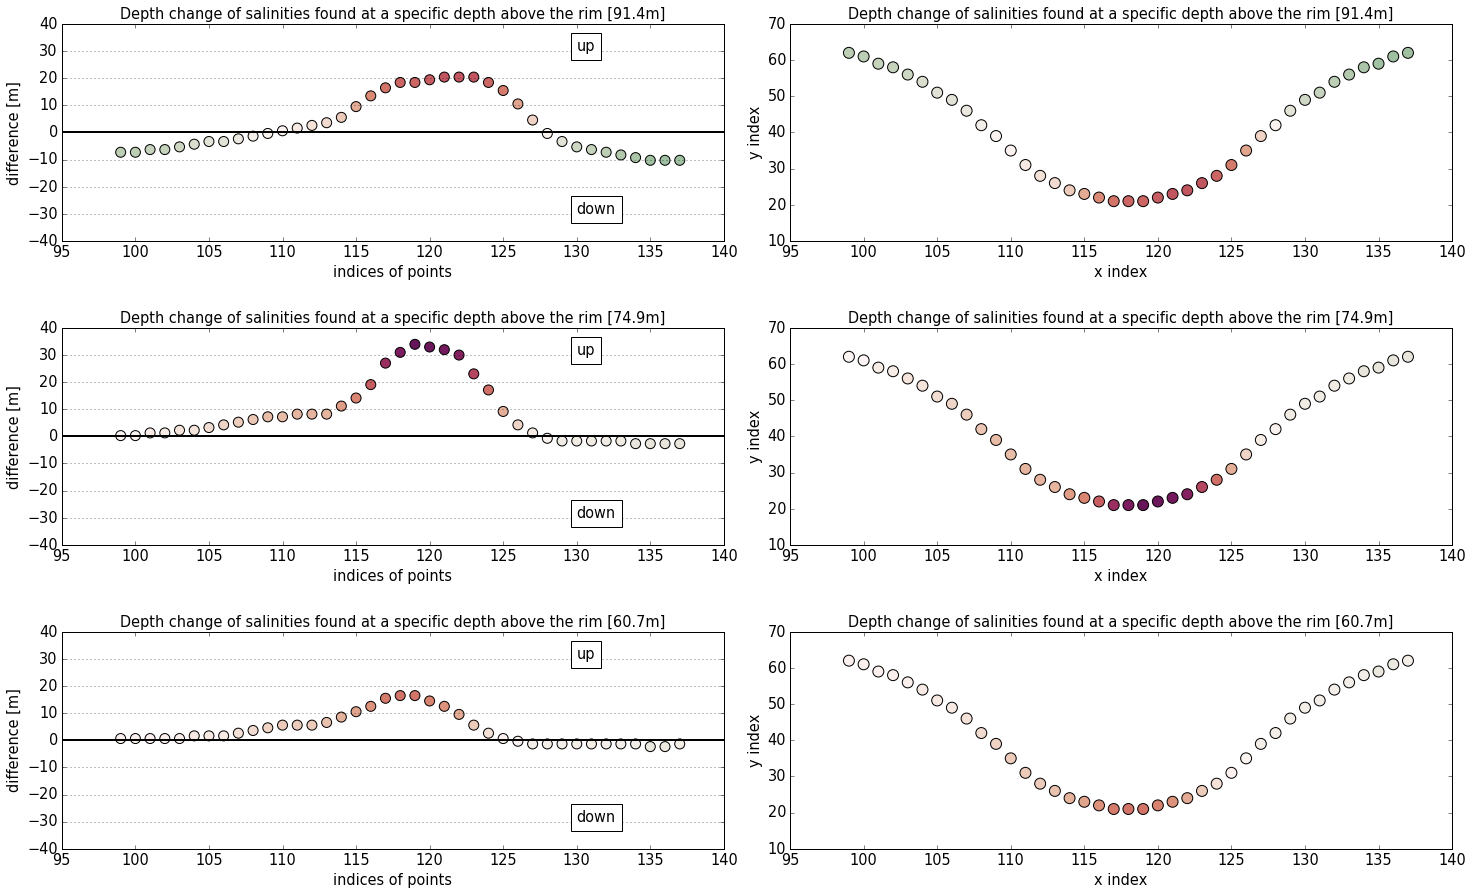

In [9]:
ind_dep_above_rim = 7

fig, ([ax4, ax5], [ax6, ax7], [ax8, ax9]) = plt.subplots(3, 2, figsize = (20,12))
fig.tight_layout(); fig.subplots_adjust(hspace=.4, wspace=.1)

depth_change, d_new = functions_upwelling_depth.calculate_ED_depth(grid, sal_profiles_dep, ind_dep_above_rim, sal_ref, dep_ref)
ax4, ax5 = functions_upwelling_depth.plot_depth_change(fig, ax4, ax5, depth_change, d_new, x_unique, y_unique, [-40,40], 'depth')

depth_change, d_new = functions_upwelling_depth.calculate_ED_depth(grid, sal_profiles_dep, ind_dep_above_rim-1, sal_ref, dep_ref)
ax6, ax7 = functions_upwelling_depth.plot_depth_change(fig, ax6, ax7, depth_change, d_new, x_unique, y_unique, [-40,40], 'depth')

depth_change, d_new = functions_upwelling_depth.calculate_ED_depth(grid, sal_profiles_dep, ind_dep_above_rim-2, sal_ref, dep_ref)
ax8, ax9 = functions_upwelling_depth.plot_depth_change(fig, ax8, ax9, depth_change, d_new, x_unique, y_unique, [-40,40], 'depth')

plt.show

# Transient: Upwelling depth at canyon rim

<function matplotlib.pyplot.show>

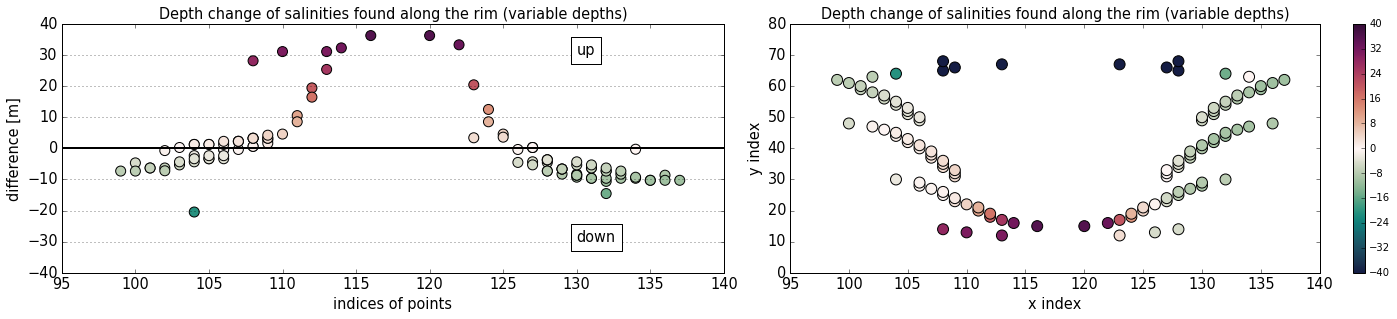

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,4))
fig.tight_layout(); fig.subplots_adjust(hspace=.4, wspace=.1)

depth_change_left, d_new_left = functions_upwelling_depth.calculate_ED_rim(sal_profiles_rim_left, sal_ref, dep_ref, depth_levels)
depth_change_right, d_new_right = functions_upwelling_depth.calculate_ED_rim(sal_profiles_rim_right, sal_ref, dep_ref, depth_levels)

ax1, ax2 = functions_upwelling_depth.plot_depth_change(fig, ax1, ax2, depth_change_left, d_new_left, rim_y_xleft_xright[:,1], rim_y_xleft_xright[:,0], [-40,40], 'rim1')
ax1, ax2 = functions_upwelling_depth.plot_depth_change(fig, ax1, ax2, depth_change_right, d_new_right, rim_y_xleft_xright[:,2], rim_y_xleft_xright[:,0], [-40,40], 'rim2')

plt.show

# Steady: Upwelling depth at specific depth

<function matplotlib.pyplot.show>

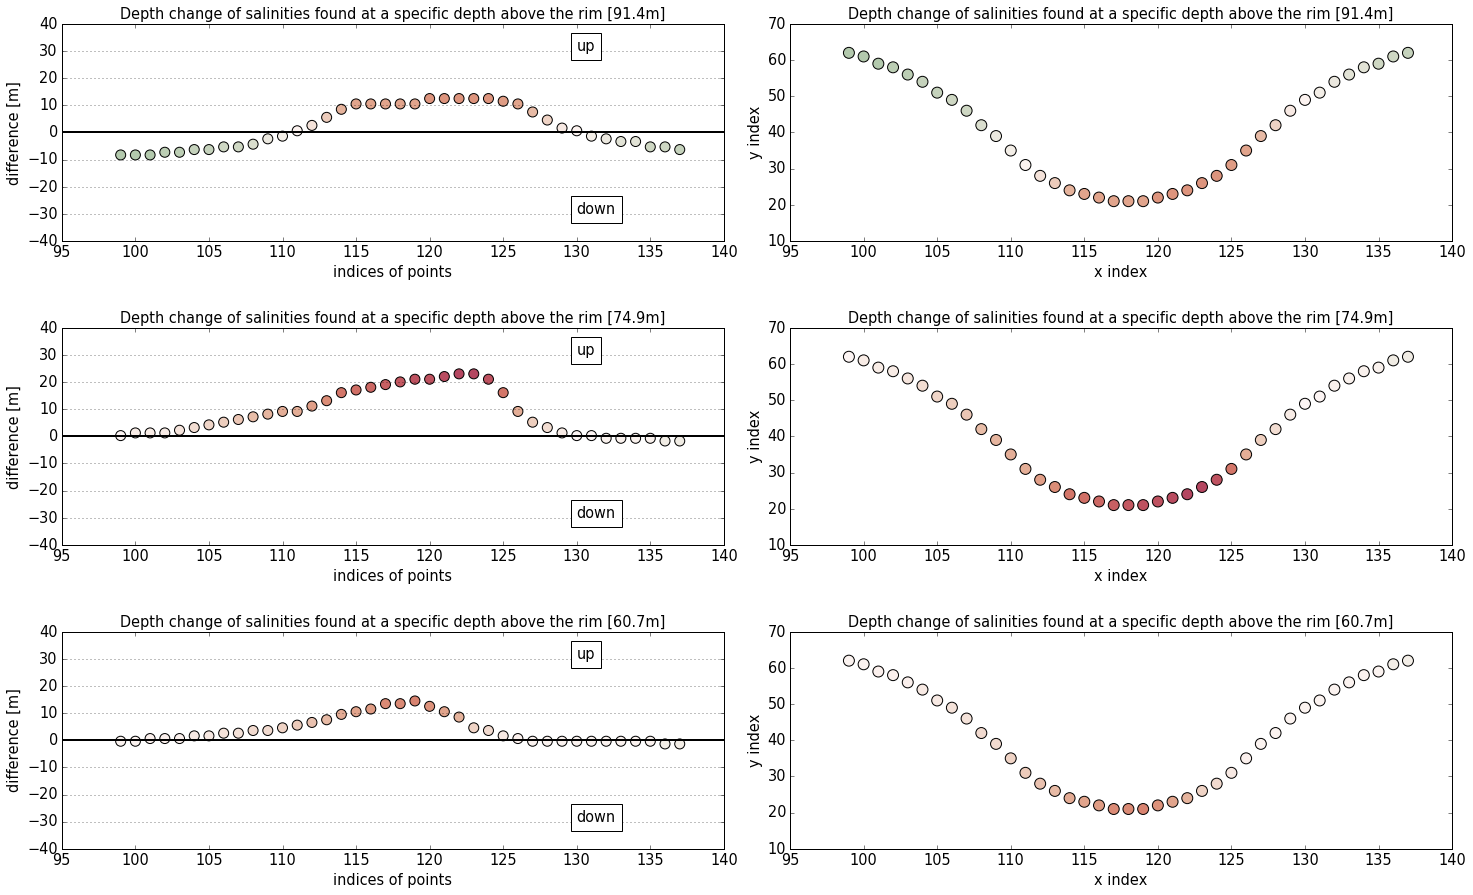

In [14]:
time_shot=202; sal_full=sal
ind_nanmax_full = functions_upwelling_depth.get_nanmax_ind_full(time_shot, sal_full)
y_unique, x_unique, x_specific, y_specific = functions_upwelling_depth.get_unique_values(ind_nanmax_full, 7)
sal_profiles_dep = functions_upwelling_depth.get_sal_profiles_rim(y_unique, x_unique, time_shot, sal_full)

ind_dep_above_rim = 7

fig, ([ax4, ax5], [ax6, ax7], [ax8, ax9]) = plt.subplots(3, 2, figsize = (20,12))
fig.tight_layout(); fig.subplots_adjust(hspace=.4, wspace=.1)

depth_change, d_new = functions_upwelling_depth.calculate_ED_depth(grid, sal_profiles_dep, ind_dep_above_rim, sal_ref, dep_ref)
ax4, ax5 = functions_upwelling_depth.plot_depth_change(fig, ax4, ax5, depth_change, d_new, x_unique, y_unique, [-40,40], 'depth')

depth_change, d_new = functions_upwelling_depth.calculate_ED_depth(grid, sal_profiles_dep, ind_dep_above_rim-1, sal_ref, dep_ref)
ax6, ax7 = functions_upwelling_depth.plot_depth_change(fig, ax6, ax7, depth_change, d_new, x_unique, y_unique, [-40,40], 'depth')

depth_change, d_new = functions_upwelling_depth.calculate_ED_depth(grid, sal_profiles_dep, ind_dep_above_rim-2, sal_ref, dep_ref)
ax8, ax9 = functions_upwelling_depth.plot_depth_change(fig, ax8, ax9, depth_change, d_new, x_unique, y_unique, [-40,40], 'depth')

plt.show

# Steady: Upwelling depth at canyon rim

In [15]:
time_shot=202; sal_full = sal
ind_nanmax_full = functions_upwelling_depth.get_nanmax_ind_full(time_shot, sal_full)
rim_y_xleft_xright = functions_upwelling_depth.get_rim_values(ind_nanmax_full, sal_full)
sal_profiles_rim_left = functions_upwelling_depth.get_sal_profiles_rim(rim_y_xleft_xright[:,0], rim_y_xleft_xright[:,1], time_shot, sal_full)
sal_profiles_rim_right = functions_upwelling_depth.get_sal_profiles_rim(rim_y_xleft_xright[:,0], rim_y_xleft_xright[:,2], time_shot, sal_full)

<function matplotlib.pyplot.show>

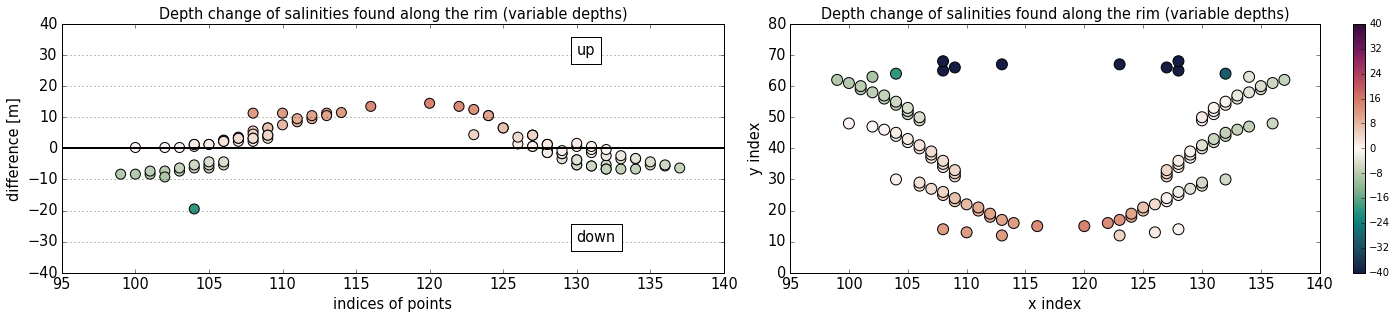

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,4))
fig.tight_layout(); fig.subplots_adjust(hspace=.4, wspace=.1)

depth_change_left, d_new_left = functions_upwelling_depth.calculate_ED_rim(sal_profiles_rim_left, sal_ref, dep_ref, depth_levels)
depth_change_right, d_new_right = functions_upwelling_depth.calculate_ED_rim(sal_profiles_rim_right, sal_ref, dep_ref, depth_levels)

ax1, ax2 = functions_upwelling_depth.plot_depth_change(fig, ax1, ax2, depth_change_left, d_new_left, rim_y_xleft_xright[:,1], rim_y_xleft_xright[:,0], [-40,40], 'rim1')
ax1, ax2 = functions_upwelling_depth.plot_depth_change(fig, ax1, ax2, depth_change_right, d_new_right, rim_y_xleft_xright[:,2], rim_y_xleft_xright[:,0], [-40,40], 'rim2')

plt.show